In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def fderivs(t,y,b,w): #Función con el modelo SIRD
    m=b/w
    S,I,R = y 
    return (-1*b*I*S,b*I*S - m*I,m*I)

def solve_system(T0, TF, Y0, DT, b, w, event=None): #Función que resuelve el modelo SIRD

    T = np.arange(T0, TF+DT, DT)
    return solve_ivp(fderivs, t_span=[T.min(), T.max()], y0=Y0, args=(b,w), events=event)

In [ ]:
%matplotlib inline
def fig1(sol):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(sol.t, sol.y[0], "b.-",label=r"S")
    ax.plot(sol.t, sol.y[1], "r.-",label=r"I")
    ax.plot(sol.t, sol.y[2], "g.-",label=r"R")


    ax.set_xlabel(r"Tiempo")
    ax.set_ylabel(r"S.I.R")
    ax.legend()


    fig.suptitle("Figura 1")

    


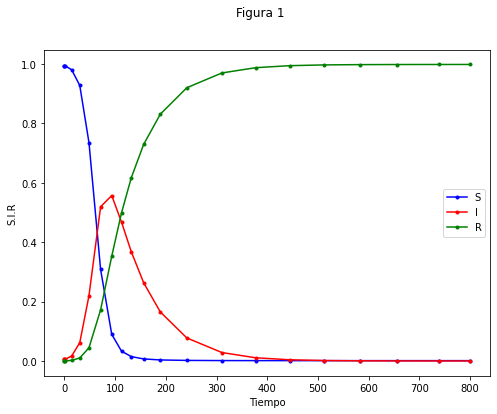

In [ ]:
Tf=750
sol = solve_system(T0=0.0, TF=Tf, Y0=[0.995, 0.005 , 0], DT=0.1, b=0.1, w=6.8)
fig1(sol)

In [ ]:
%matplotlib inline
def fig2(sol):
    n=3
    
    fig, axs = plt.subplots(1,n, figsize=(24, 6))

    for i in range(n):

        axs[i].plot(sol[i].t, sol[i].y[0], ".b-",label=r"S")
        axs[i].plot(sol[i].t, sol[i].y[1], ".r-",label=r"I")
        axs[i].plot(sol[i].t, sol[i].y[2], ".g-",label=r"R")


        axs[i].set_xlabel(r"Tiempo")
        axs[i].set_ylabel(r"S.I.R")
        axs[i].legend()

    fig.suptitle("Figura 2")


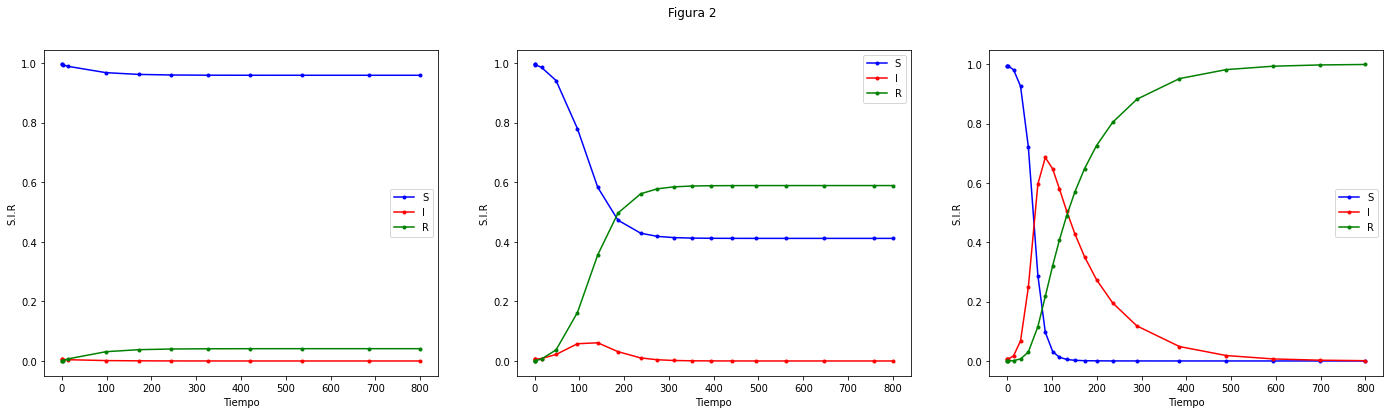

In [ ]:
sol1 = solve_system(T0=0.0, TF=Tf, Y0=[0.995, 0.005 , 0], DT=0.1, b=0.1, w=0.9)
sol2 = solve_system(T0=0.0, TF=Tf, Y0=[0.995, 0.005 , 0], DT=0.1, b=0.1, w=1.5)
sol3 = solve_system(T0=0.0, TF=Tf, Y0=[0.995, 0.005 , 0], DT=0.1, b=0.1, w=10.7)


sol=[sol1,sol2,sol3]
fig2(sol)

In [ ]:
%matplotlib inline
def fig3(W,I,S):
    
    fig, ax = plt.subplots( figsize=(8, 6))
    ax.plot(W, I, ".r-",label=r"Imax")
    ax.plot(W, S, ".b-",label=r"Sf")


    ax.set_xlabel(r"w")
    ax.legend()

    fig.suptitle("Figura 3")


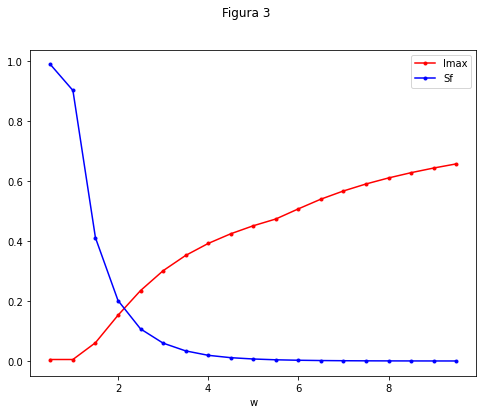

In [ ]:
W=[]
Im=[]
Sf=[]
for i in range(1,20):

    sol = solve_system(T0=0.0, TF=Tf, Y0=[0.995, 0.005 , 0], DT=0.1, b=0.1, w=0.5*i)
    W.append(0.5*i)
    Sf.append(sol.y[0][-1])
    Im.append(sol.y[1].max())
    

fig3(W,Im,Sf)

In [ ]:
def fderivsMod(t,y,b,w,p): #Función con el modelo SIRD modificado
    m=b/w
    S,I,R = y 
    return (-1*b*I*S,b*I*S - m*I + p*R,m*I - p*R)

def solve_systemMod(T0, TF, Y0, DT, b, w, p, event=None): #Función que resuelve el modelo SIRD modificado

    T = np.arange(T0, TF+DT, DT)
    return solve_ivp(fderivsMod, t_span=[T.min(), T.max()], y0=Y0, args=(b,w,p), events=event)


In [ ]:
%matplotlib inline
def fig4(sol):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(sol.t, sol.y[0], "b.-",label=r"S")
    ax.plot(sol.t, sol.y[1], "r.-",label=r"I")
    ax.plot(sol.t, sol.y[2], "g.-",label=r"R")


    ax.set_xlabel(r"Tiempo")
    ax.set_ylabel(r"S.I.R")
    ax.legend()


    fig.suptitle("Figura 4")

    


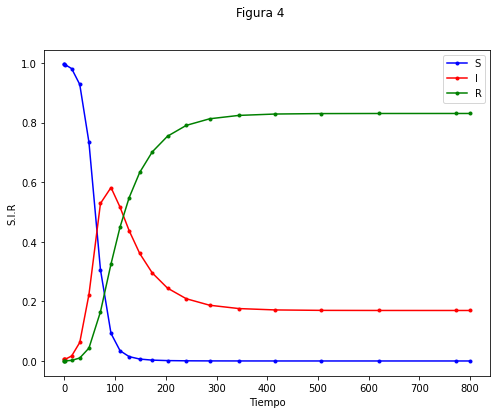

In [ ]:
sol = solve_systemMod(T0=0.0, TF=Tf, Y0=[0.995, 0.005 , 0], DT=0.1, b=0.1, w=6.8, p = 0.003)
fig4(sol)